# Инициализация:

- Сначала мы создаем суперпозицию всех возможных состояний для 3 кубитов. Это достигается применением Hadamard-гейтов (H) ко всем кубитам.
- После применения Hadamard-гейтов, состояние системы можно описать как: $|\psi_0\rangle = \frac{1}{\sqrt{8}} \sum_{x=0}^{7} |x\rangle$
- Здесь каждый из 8 возможных состояний (от 000 до 111) имеет равную амплитуду.

# Оракул:
- Оракул предназначен для изменения знака амплитуды искомого состояния, в данном случае 110 (число 6).
- В коде это реализовано с помощью многоконтролируемого Z-гейта, который инвертирует амплитуду состояния 110.
- После применения оракула, состояние системы становится: $|\psi_1\rangle = \frac{1}{\sqrt{8}} \sum_{x \neq 6} |x\rangle - \frac{1}{\sqrt{8}} |110\rangle$

## Реализация
- Инвертируется первый кубит (circuit.x(qubits[0])), чтобы подготовить его для MCX-гейта, так как мы хотим, чтобы он не был контролирующим.
- Применяются Hadamard-гейты к целевому кубиту перед и после MCX-гейта, чтобы реализовать эффект Z-гейта.
- Применяется MCX-гейт (circuit.mcx(qubits[0:2], qubits[2])), который инвертирует целевой кубит, если первые два кубита равны 11.
- Возвращается первый кубит в исходное состояние (circuit.x(qubits[0])).


# Диффузионный оператор:
- Диффузионный оператор усиливает амплитуду искомого состояния, отражая все состояния относительно среднего.
- После применения диффузионного оператора, амплитуда состояния 110 увеличивается, а амплитуды остальных состояний уменьшаются по условию Борна.

## Реализация
- Применяются Hadamard-гейты ко всем кубитам, чтобы перейти в базис, где инверсия всех состояний эквивалентна применению X-гейтов.
- Инвертируются все состояния с помощью X-гейтов (circuit.x(qubits)).
- Применяется MCX-гейт к последнему кубиту, окруженный Hadamard-гейтами, чтобы реализовать многоконтролируемый Z-гейт.
- Снова инвертируются все состояния с помощью X-гейтов.
- Применяются Hadamard-гейты, чтобы вернуться в исходный базис.

Результаты измерений для 1000 выполнений: {'110': 950, '011': 7, '111': 8, '001': 6, '000': 2, '010': 15, '100': 6, '101': 6}


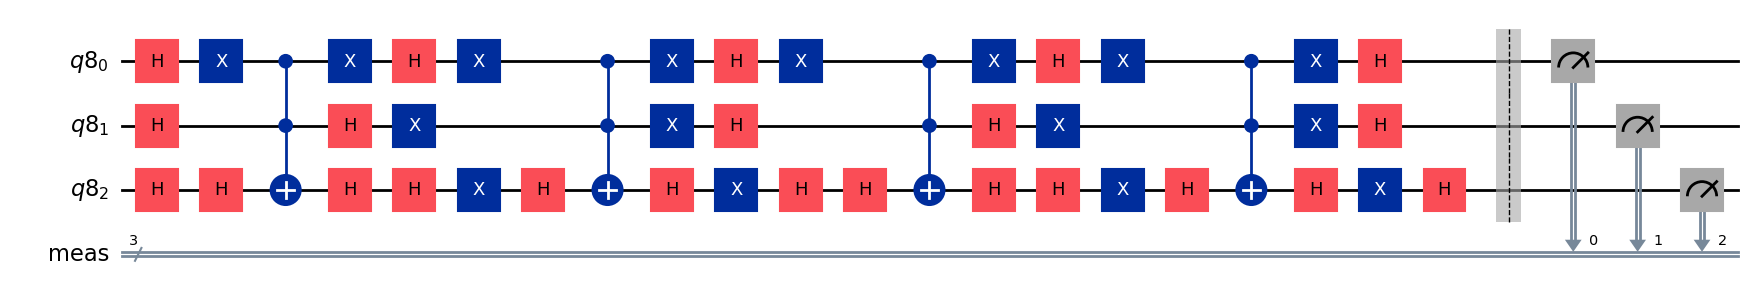

In [12]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_aer import Aer, AerSimulator

def simulate_with_shots(qc, shots):
    qc.measure_all()
    simulator = AerSimulator()
    result = simulator.run(qc, shots=shots).result()
    counts = result.get_counts(qc)
    print(f"Результаты измерений для {shots} выполнений:", counts)

def oracle_6(circuit, qubits):
    circuit.x(qubits[0])

    circuit.h(qubits[2])
    circuit.mcx(qubits[0:2], qubits[2])
    circuit.h(qubits[2])

    circuit.x(qubits[0])

def diffusion_operator(circuit, qubits):
    circuit.h(qubits)

    circuit.x(qubits)

    circuit.h(qubits[-1])
    circuit.mcx(qubits[:-1], qubits[-1])
    circuit.h(qubits[-1])

    circuit.x(qubits)

    circuit.h(qubits)

n_qubits = 3
qr = QuantumRegister(n_qubits)
circuit = QuantumCircuit(qr)

circuit.h(qr)

iterations = int(np.sqrt(2**n_qubits))

for _ in range(iterations):
    oracle_6(circuit, qr)
    diffusion_operator(circuit, qr)

simulate_with_shots(circuit, 1000)
circuit.draw(output='mpl')